# ANN to predicted customer's exiting or churning a bank

Ale Seun Joseph

In [230]:
import tensorflow as tf

In [231]:
import pandas as pd

In [232]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Churn_Modelling.csv")

In [233]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Statement of problem: Based on the features given, we want to predict whether a customer will exist the bank or stay.

In [234]:
## Dividing the dataset into independent and dependent features
## Exited is the dependent feature, while all others are dependent features
##RowNumber, CustomerId and Surname are Irrelevant features
X = df.iloc[:,3:13] ##meaning all the rows starting from 3 to 13
y = df.iloc[:,13] ##meaning all the rows but only output column 13

In [235]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [236]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [237]:
df.shape

(10000, 14)

In [238]:
## Feature engineering
##Handling the categorical features using one hot encoding
count_unique = X['Geography']. nunique()
print(count_unique )

3


In [239]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [240]:
pd.get_dummies(X['Geography'], drop_first = True)## We can reduce it to just two column, since the values,
##of two already reveals what the third will be

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [241]:
## creating a variable for it
geography = pd.get_dummies(X['Geography'], drop_first = True)

In [242]:
## similarly for geder
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [243]:
## cocatenating the two variables with the dataframe
X = X.drop(['Geography', 'Gender'], axis = 1)##first we drop the initial ones, axis=1 implies drop only the column

In [244]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [245]:
pd.concat([X,geography,gender],axis = 1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [246]:
X = pd.concat([X,geography,gender],axis = 1) ## assigning the new X to variable X

Splitting the dataset into training and test set

In [247]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

feature scaling

In [248]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [249]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [250]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [251]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

Both the training and test set has been transformed

In [252]:
X_train.shape

(8000, 11)

Creating the ANN

In [253]:
from tensorflow.keras.models import Sequential

In [254]:
from tensorflow.keras.layers import Dense

In [255]:
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU

In [256]:
from tensorflow.keras.layers import Dropout

In [257]:
##Initializing the ANN
classifier =  Sequential()

In [258]:
classifier.add(Dense(units=11, activation='relu'))#nos. of units is the number of input layer which is 
#number of columns in X_train

In [259]:
##Add the first hidden layer
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dropout(0.2))
## depending on numbers of neurons you want
##although there are techniques for computing nos. of neurons in each hidden layers

In [260]:
##Add the second hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [261]:
##Add the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [262]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

NB: by default adam uses learning rate of 0.1 to vary it, we use;

In [263]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [264]:
##effecting it

classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [265]:
##early_stopping means stop training when a monitored metric has stopped improving
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [266]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.4904 - accuracy: 0.7934 - val_loss: 0.4456 - val_accuracy: 0.7952
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4396 - accuracy: 0.8043 - val_loss: 0.4067 - val_accuracy: 0.8217
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4139 - accuracy: 0.8162 - val_loss: 0.3977 - val_accuracy: 0.8254
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3925 - accuracy: 0.8308 - val_loss: 0.3768 - val_accuracy: 0.8406
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3866 - accuracy: 0.8304 - val_loss: 0.3782 - val_accuracy: 0.8425
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3860 - accuracy: 0.8364 - val_loss: 0.3776 - val_accuracy: 0.8451
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3793 - accuracy: 0.8412 - val_loss: 0.3690 - val_accuracy:

In [267]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

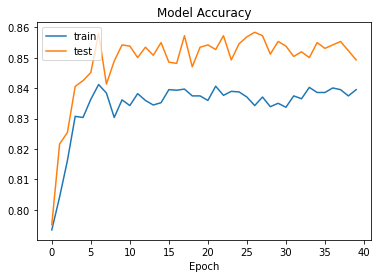

In [268]:
## Summary history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

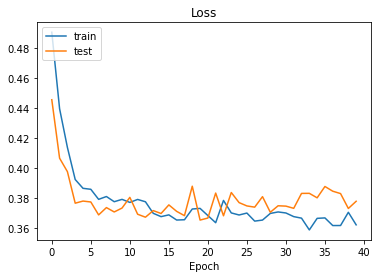

In [269]:
## without early stopping
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [270]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [271]:
## construct confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1521,   74],
       [ 208,  197]], dtype=int64)

In [272]:
## compute the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [273]:
score

0.859

This gives 86% accuracy

In [274]:
## to get the assigned weights
classifier.get_weights()

[array([[-2.5518566e-02, -5.6276017e-01, -4.0810055e-01,  1.1608982e-01,
         -3.6950356e-01,  2.1613653e+00,  1.5288538e-01,  6.1996603e-01,
          1.3241422e-01, -4.6557549e-01,  2.7622297e-01],
        [ 9.9701244e-01,  1.1402258e+00, -3.5773087e-01,  2.1683927e+00,
          1.2132745e+00, -6.4615959e-01, -2.5758553e+00, -9.2811847e-01,
         -3.6639307e-02,  4.4750464e-01, -1.6093172e+00],
        [-1.3319248e-01,  4.9032843e-01,  5.8750671e-01,  4.6702185e-01,
          9.2178190e-01,  1.1868890e-01,  3.2315731e-01,  7.7751553e-01,
          4.8131503e-02,  2.6825878e-01,  1.5180098e-01],
        [ 1.0463942e+00, -1.4054559e-01, -1.1856434e+00, -4.1228604e-01,
         -5.5850857e-01,  2.4256407e-01, -8.0689102e-02, -2.3458545e+00,
          1.6411616e-01, -3.0266633e+00,  2.3785911e+00],
        [ 4.0831008e+00, -7.1190512e-01, -2.6309758e-01, -3.3143842e-01,
         -4.8276739e+00, -7.1248108e-01, -7.3625147e-01,  1.6487280e-01,
          3.4311883e-02, -1.4570234e+0

In [275]:
import pickle

In [278]:
#to store the data in a file
pickle.dump(model_history, open('model_history.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://588741fb-b575-4d29-b1c6-53e0db5be8de/assets


In [279]:
pickle.dump(model_history, open('model_history.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://a91e8655-c4d7-4f54-93d3-bfec39b76ac3/assets


                                                                                    Ale Seun Joseph:
                                                                                    +2348161369964
                                                                                    aleseun@yahoo.com